In [15]:
import numpy as np
import ipywidgets as widgets
import matplotlib.pyplot as plt

In [16]:
%run ../../Lab/L2/measureErrors.py
saveFigure = True

## Errors

### Ex 1-3

### Ex. 4 Round-off errors

In [17]:
def testErrA(n = 10):
    A = np.random.rand(n,n)
    Icomp = np.matmul(np.linalg.inv(A),A)
    Iexact = np.eye(n)
    absrelerror(Iexact, Icomp)

#### Random matrix $A$ with size $n=10$

In [18]:
testErrA()

*------------------------------------------------------------*
This program illustrates the absolute and relative error.
*------------------------------------------------------------*
Absolute error: 3.607074220334548e-15
Relative error: 1.1406570225533215e-15, or in percent: 1.1406570225533215e-13


#### $n=100$

In [19]:
testErrA(100)

*------------------------------------------------------------*
This program illustrates the absolute and relative error.
*------------------------------------------------------------*
Absolute error: 3.3808034506192096e-12
Relative error: 3.38080345061921e-13, or in percent: 3.3808034506192097e-11


#### $n=1000$

In [20]:
testErrA(1000)

*------------------------------------------------------------*
This program illustrates the absolute and relative error.
*------------------------------------------------------------*
Absolute error: 8.47487479860293e-11
Relative error: 2.679990724834604e-12, or in percent: 2.6799907248346043e-10


<span style="color:red">**Note**:</span> The execution time changes with the size of $n$ almost linearly, but for $n=10000$, it will take much longer time.

### Ex. 5 Discretization Errors

Program that illustrate the concept discretization.

Replacing continuous with discrete, i.e. represent a continuous function on a interval with a finite number of points.

Here, the derivative `f'(x)` is computed in a finite number of points on a interval. 

The density, the number of points is determined by the choice of the discretization parameter $h$.

**NOTE**: $h$ should not be too large or too small. A good range is in $[10^{-5},1]$.

In [21]:
h = 0.1

In [22]:
# The exact solution
N = 400
l = 0
u = 2
x = np.linspace(l, u, N)
f_exa = np.exp(x)

# check if h is too large or too small
if h > 1 or h < 1e-5:
    h = 0.5

xh = np.linspace(l, u, int(abs(u-l)/h))

fprimF = ForwardDiff(np.exp, xh, h);


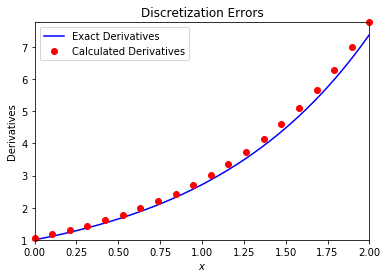

In [23]:
# Plot
fig, ax = plt.subplots(1)
ax.plot(x, f_exa, color='blue')
ax.plot(xh, fprimF, 'ro', clip_on=False)
ax.set_xlim([0,2])
ax.set_ylim([1,max(fprimF)])
ax.set_xlabel(r'$x$')
ax.set_ylabel('Derivatives')
ax.set_title('Discretization Errors')
ax.legend(['Exact Derivatives','Calculated Derivatives'])

if saveFigure:
    filename = 'DiscretizationError_h' + str(h) + '.pdf'
    fig.savefig(filename, format='pdf', dpi=1000, bbox_inches='tight')


## Computer Arithmetic

Machine limits for floating point types use `np.finfo(float)`

In [24]:
print('machhine epsilon in python is: ' + str(np.finfo(float).eps))

machhine epsilon in python is: 2.220446049250313e-16


The overflow in python is shown by `np.finfo(float).max` and the underflow by `np.finfo(float).tiny`

In [25]:
print('The largest real number in python is: ' + str(np.finfo(float).max))
print('The smallest positive real number in python is: ' + str(np.finfo(float).tiny))

The largest real number in python is: 1.7976931348623157e+308
The smallest positive real number in python is: 2.2250738585072014e-308


Other attributes of `finfo` can be found [here](https://docs.scipy.org/doc/numpy-1.15.1/reference/generated/numpy.finfo.html)

## Computation of the derivative

The function $f(x) = e^x$ in $x=1$ is used as test function.

* forward difference: $\displaystyle{f'(x)\approx\frac{f(x+h)-f(x)}{h}}$
* central difference: $\displaystyle{f'(x)\approx\frac{f(x+h)-f(x-h)}{2h}}$
* five points difference: $\displaystyle{f'(x)\approx\frac{-f(x+2h)+8f(x+h)-8f(x-h)+f(x-2h)}{12h}}$

In [26]:
# choose h from 0.1 to 10^-t, t>=2
t = 15
h = 10**np.linspace(-1,-t, 30)

In [27]:
# The exact derivative at x=1
x = 1
fprimExact = np.exp(1)

# Numeric derivative using the three methods
fprimF = ForwardDiff(np.exp, x, h);
fprimC = CentralDiff(np.exp, x, h);
fprim5 = FivePointsDiff(np.exp, x, h);

# Relative error
felF = abs(fprimExact - fprimF)/abs(fprimExact);
felC = abs(fprimExact - fprimC)/abs(fprimExact);
fel5 = abs(fprimExact - fprim5)/abs(fprimExact);


NameError: name 'SaveFigure' is not defined

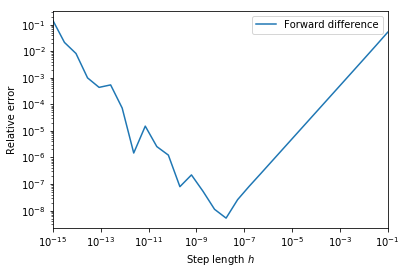

In [28]:
# Plot
fig, ax = plt.subplots(1)
ax.loglog(h, felF)
# ax.loglog(h, felC)
# ax.loglog(h, fel5)
ax.autoscale(enable=True, axis='x', tight=True)
ax.set_xlabel(r'Step length $h$')
ax.set_ylabel('Relative error')
ax.legend(['Forward difference','Central difference', 'Five points difference'])

if SaveFigure:
    filename = 'NumericalDerivative.pdf'
    fig.savefig(filename, format='pdf', dpi=1000, bbox_inches='tight')

In [38]:

2**(-8)

0.00390625